<img src="./logo_UTN_3.svg" align="right" width="200" /> 

### Teoría de los Circuitos 2

# Trabajo semanal 5
### Axel Nathanel Nahum


## Introduccion

En este notebook encontraremos el diseño de un filtro $Pasa-Altos$ $Notch$ a partir de una platnilla dada. Para lograr esto, partiremos de un filtro $Pasa-Bajos$ $Notch$, el cual transformaermos mediante un $nucleo$ $de$ $transformacion$, para asi lograr nuestra transferencia deseada, es decir, la de un $Pasa-Altos$ $Notch$.

## Resolucion

### Resolucion original

In [39]:
from IPython.display import IFrame
IFrame("./Resolucion_5.pdf", width=900, height=1000)

En este PDF se observa la resolucion del ejercicio de la $TS5$ correspondiente a un filtro $Pasa-Altos$ $Notch$ de orden 3. Este se realizo mediante $Butterworth$ (Por suposicion de valores de atenuacion) y de orden 3. Para lograr esto, se planteo la transferencia de orden 3 $Butter$ y apartir de esa, se encontro la transferencia Pasa-Bajos Notch (Agregando un $S^2$ a la etapa de segundo orden) para posteriormente aplcar la transformacion con el nucleo asociado al $Pasa-Altos$, es decir, $\frac{1}{S}$. Ademas de todo esto, podemos ver que la transferencia de primer orden es del tipo $RC$, con salida en la $resistencia$. Esto se debe a que no podemos crear un notch de primer orden, por lo tanto se opto por cascadear un pasa altos de primer orden.

Otra cosa a tener en cuenta es el $Q$ calculado en el $PDF$. Este no es 1 y tiene sentido. En este circuito, hay una resta entre R1 y R2. Si Q es 1, R1 es igual a R2. Esto provocaria que se cancele el termino independiente del $numerador$, logrando que se convierta en un $Pasa-Altos$ normal.

La transferencia es: 

$$ T(s) = \frac{V_2}{V_1} = \frac{S^2 + \frac{R1-R2}{R1.R2.R5.C^2}}{S^2 + S. \frac{1}{R1.C} + \frac{1}{R1.R2.R5.C^2}} * \frac{S}{S + \frac{1}{R6.C^2}}$$

$d)$ $Ejerciico$ $Propuesto$ $por$ $Schaumann$ 

<img src="./Schaumann.PNG" align="center" width="600" /> 

Hay claras diferencias, como por ejemplo la ubicacion de $R5$ en cada uno. En este circuito esta contra $masa$ pero en el prpuesto para la  $TS5$, esta contra $Vi$. Esto ultimo es sumamente importante ya que agregas un nuevo termino. Esto ultimo provoca que el Pasa-Banda prpuesto por $Schaumann$, se convierta en un notch. A parte, otras diferencias las encontramos en la ubicacion de ciertas resistencias y capacitores. 

In [3]:
# Esta parte de código la agregamos SOLO en los notebooks para fijar el estilo de los gráficos.
#
#%%  Inicialización de librerías (esto NO es parte del script demo_seg_orden1.py)
# Setup inline graphics: Esto lo hacemos para que el tamaño de la salida, 
# sea un poco más adecuada al tamaño del jupyter notebook documento

# algún bug cuando lo hice:
plt.figure(1)
plt.close(1)

import matplotlib as mpl

fig_sz_x = 13
fig_sz_y = 7
fig_dpi = 80 # dpi
fig_font_size = 16

mpl.rcParams['figure.figsize'] = (fig_sz_x, fig_sz_y)
mpl.rcParams['figure.dpi'] = fig_dpi
plt.rcParams.update({'font.size':fig_font_size})

#%%  Fin - Inicialización de librerías

[1.         0.         0.11111111 0.        ]
[1. 2. 2. 1.]


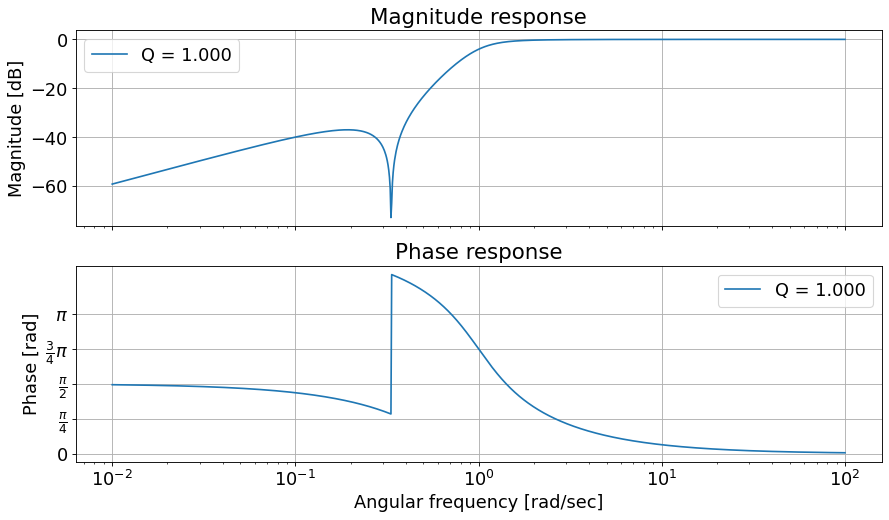

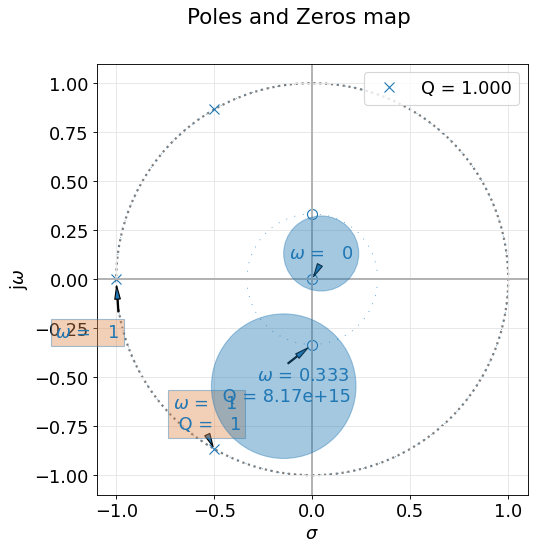

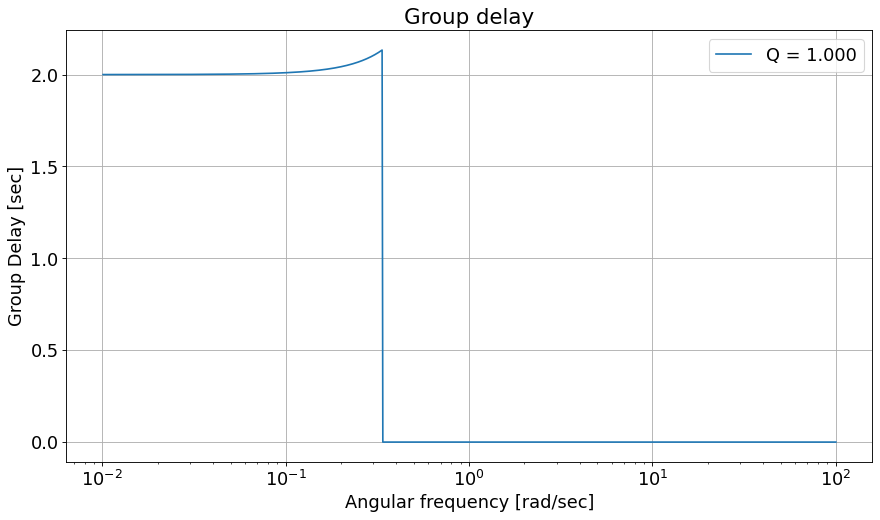

In [10]:
from scipy.signal import TransferFunction
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as sig

from pytc2.sistemas_lineales import pzmap, GroupDelay, bodePlot, analyze_sys

wp = 2 * np.pi * 40000
ws = 2 * np.pi * 10000
Ωws = ws/wp

# Orden del filtro
nn = 3

αmax = 1
e = np.sqrt(10**(αmax/10) - 1) # "epsilon"
Ωwb = wp * e**(+1/nn)

for n in range (1 , 9):
 αminn = 10 * np.log10(1 + (e**2 * Ωws**(2*n)))
# print(αminn)

qq = 1/(2 * np.cos(np.pi/3))

num_alt = [1, 0, 1]

Z,P,K = sig.buttap(3)
Num,Den = sig.zpk2tf(Z,P,K)
Num_mp,Den_mp = sig.lp2hp(Num,Den)
Num_mp[1] = 0
Num_mp[2] = 1/9
Num_mp[3] = 0

print (Num_mp)
print (Den_mp)

TF = TransferFunction(Num_mp, Den_mp)

analyze_sys(TF, sys_name='Q = {:3.3f}'.format(qq))

En estos graficos podremos observar y analizar la $respuesta$ $en$ $frecuencia$ $normalizada$ en un $\omega_0$ de $1$ (este valor corresponde a hacer $ε^{(+1/n)}$, siendo n = 3 y e = 1). En este caso se observa un filtro $Pasa-Altos$ $Notch$ de maxima planicidad con polos ubicados en $$ y $\frac{\pi}{3}$ y $ceros$ en el eje $j\omega$.

$La$ $transferencia$ $asociada$ $a$ $estos$ $graficos$ $es:$

$$ T(s) = \frac{V_2}{V_1} = \frac{S^2 + K^2\omega_0^2}{S^2 + S. \frac{\omega_0}{Q} + \omega_0^2} * \frac{S}{S + \omega_p}$$

$Donde:$

* $\omega_0 = 1$ y $Q = 1$. Esto es corresponde a una $transferencia$ $normalizada$.

En esta se puede observar claramente un filtro $Pasa-Altos$ $Notch$ en $cascada$ con un filtro $Pasa-Altos$ normal, este ultimo siendo de primer orden. Esta transferencia se encuentra normalizada en $w_0 = 1$ pero se podria desnormalizar teniendo en cuenta otra S distinta. Esta seria igual a $\frac{Sn}{Ω\omega}$, donde Sn (domino de S normalizado) y Ω$\omega$ (norma de normalizacion de frecuencia). 

$Esta$ $nueva$ $transferencia$ $quedaria:$

$$ T(s) = \frac{V_2}{V_1} = \frac{S^2}{S^2 + S. \frac{Ω\omega_0}{Q} + Ω\omega_0^2} * \frac{S}{S + Ω\omega_0}$$

$Donde:$

* $Ω\omega_0 = 2 * \pi * 300Hz$

Esta ultima sera representada por el grafico proximo de LTspice.

## Circuito LTspice

<img src="./Circuito_5.PNG" align="middle" width="1050" /> 

## Respuesta en frecuencia LTspice

<img src="./Respuesta_Frecuencia_5.PNG" align="middle" width="1000" /> 

Se observa como el filtro corta justo en $100Hz$, eliminando esa frecuencia como se pide en la $TS5$. Por otro lado, se ve como a $300Hz$ $(Frecuencia$ $de$ $corte)$, la atencuacion es de $3dB$.